In [66]:
%matplotlib notebook
import os
import sys
sys.path.append("numpy_path")
import numpy as np
import struct
from matplotlib import pyplot as plt
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Dense, Input, Concatenate
from keras.optimizers import RMSprop
import keras.callbacks as cb
from keras.callbacks import EarlyStopping, ModelCheckpoint
from mpl_toolkits import mplot3d
from keras.utils import plot_model

# define loss history
class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

#plot losses
def plot_losses(losses):
    plt.plot(losses)
    plt.title('Loss per batch')
    plt.show()

def feature_scaling(X):
    X = X.T
    for i in range(7):
        mean = X[i].mean()
        std = X[i].std()
        X[i] = [(x - mean)/std for x in X[i]]
    return X.T

# input dimension
dim = 50

def init_model():
    model = Sequential()
    model.add(Dense(10, input_dim=dim))
    #model.add(Dropout(0.9))   # dropouot actually is bad in this case
    model.add(Activation('relu'))
    model.add(Dense(20))
    #model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    # use mean squared error to measure the looses
    model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(lr = 0.001),
              metrics=['accuracy'])
    return model

In [67]:
A1 = Input(shape=(50,),name='A1')
A2 = Dense(10, activation='relu',name='A2')(A1)
A3 = Dense(20, activation='relu',name='A3')(A2)
A4 = Dense(1, activation='sigmoid',name='A4')(A3)
A = Model(inputs = A1, outputs = A4)

In [68]:
B0 = Input(shape = (1,), name='B0')
#concat_layer= Concatenate()([B0, A4])
B1 = Dense(10, activation = 'relu', name = 'B1')(B0)
B2 = Dense(20, activation = 'relu', name = 'B2')(B1)
B3 = Dense(50, activation = 'relu', name = 'B3')(B2)
B = Model(inputs = B0, outputs = B3)

Train on 30 samples, validate on 10 samples
Epoch 1/500
 - 2s - loss: 0.2016 - acc: 0.0000e+00 - val_loss: 0.1669 - val_acc: 0.2000
Epoch 2/500
 - 0s - loss: 0.1997 - acc: 0.0000e+00 - val_loss: 0.1653 - val_acc: 0.2000
Epoch 3/500
 - 0s - loss: 0.1977 - acc: 0.0000e+00 - val_loss: 0.1635 - val_acc: 0.2000
Epoch 4/500
 - 0s - loss: 0.1956 - acc: 0.0000e+00 - val_loss: 0.1617 - val_acc: 0.2000
Epoch 5/500
 - 0s - loss: 0.1934 - acc: 0.0000e+00 - val_loss: 0.1599 - val_acc: 0.2000
Epoch 6/500
 - 0s - loss: 0.1911 - acc: 0.0000e+00 - val_loss: 0.1580 - val_acc: 0.2000
Epoch 7/500
 - 0s - loss: 0.1889 - acc: 0.0000e+00 - val_loss: 0.1561 - val_acc: 0.2000
Epoch 8/500
 - 0s - loss: 0.1866 - acc: 0.0000e+00 - val_loss: 0.1542 - val_acc: 0.2000
Epoch 9/500
 - 0s - loss: 0.1841 - acc: 0.0000e+00 - val_loss: 0.1522 - val_acc: 0.2000
Epoch 10/500
 - 0s - loss: 0.1816 - acc: 0.0000e+00 - val_loss: 0.1501 - val_acc: 0.2000
Epoch 11/500
 - 0s - loss: 0.1790 - acc: 0.0000e+00 - val_loss: 0.1479 - va

Epoch 93/500
 - 0s - loss: 0.0985 - acc: 0.0333 - val_loss: 0.1003 - val_acc: 0.0000e+00
Epoch 94/500
 - 0s - loss: 0.0984 - acc: 0.0333 - val_loss: 0.1003 - val_acc: 0.0000e+00
Epoch 95/500
 - 0s - loss: 0.0984 - acc: 0.0333 - val_loss: 0.1003 - val_acc: 0.0000e+00
Epoch 96/500
 - 0s - loss: 0.0984 - acc: 0.0333 - val_loss: 0.1002 - val_acc: 0.0000e+00
Epoch 97/500
 - 0s - loss: 0.0984 - acc: 0.0333 - val_loss: 0.1003 - val_acc: 0.0000e+00
Epoch 98/500
 - 0s - loss: 0.0984 - acc: 0.0333 - val_loss: 0.1002 - val_acc: 0.0000e+00
Epoch 99/500
 - 0s - loss: 0.0984 - acc: 0.0333 - val_loss: 0.1002 - val_acc: 0.0000e+00
Epoch 100/500
 - 0s - loss: 0.0983 - acc: 0.0333 - val_loss: 0.1002 - val_acc: 0.0000e+00
Epoch 101/500
 - 0s - loss: 0.0983 - acc: 0.0333 - val_loss: 0.1002 - val_acc: 0.0000e+00
Epoch 102/500
 - 0s - loss: 0.0983 - acc: 0.0333 - val_loss: 0.1002 - val_acc: 0.0000e+00
Epoch 103/500
 - 0s - loss: 0.0983 - acc: 0.0333 - val_loss: 0.1001 - val_acc: 0.0000e+00
Epoch 104/500
 - 

Epoch 185/500
 - 0s - loss: 0.0971 - acc: 0.0333 - val_loss: 0.0988 - val_acc: 0.0000e+00
Epoch 186/500
 - 0s - loss: 0.0971 - acc: 0.0333 - val_loss: 0.0988 - val_acc: 0.0000e+00
Epoch 187/500
 - 0s - loss: 0.0971 - acc: 0.0333 - val_loss: 0.0988 - val_acc: 0.0000e+00
Epoch 188/500
 - 0s - loss: 0.0970 - acc: 0.0333 - val_loss: 0.0988 - val_acc: 0.0000e+00
Epoch 189/500
 - 0s - loss: 0.0970 - acc: 0.0333 - val_loss: 0.0988 - val_acc: 0.0000e+00
Epoch 190/500
 - 0s - loss: 0.0970 - acc: 0.0333 - val_loss: 0.0987 - val_acc: 0.0000e+00
Epoch 191/500
 - 0s - loss: 0.0970 - acc: 0.0333 - val_loss: 0.0987 - val_acc: 0.0000e+00
Epoch 192/500
 - 0s - loss: 0.0970 - acc: 0.0333 - val_loss: 0.0987 - val_acc: 0.0000e+00
Epoch 193/500
 - 0s - loss: 0.0970 - acc: 0.0333 - val_loss: 0.0986 - val_acc: 0.0000e+00
Epoch 194/500
 - 0s - loss: 0.0970 - acc: 0.0333 - val_loss: 0.0986 - val_acc: 0.0000e+00
Epoch 195/500
 - 0s - loss: 0.0969 - acc: 0.0333 - val_loss: 0.0986 - val_acc: 0.0000e+00
Epoch 196/

Epoch 277/500
 - 0s - loss: 0.0957 - acc: 0.0333 - val_loss: 0.0971 - val_acc: 0.0000e+00
Epoch 278/500
 - 0s - loss: 0.0957 - acc: 0.0333 - val_loss: 0.0970 - val_acc: 0.0000e+00
Epoch 279/500
 - 0s - loss: 0.0957 - acc: 0.0333 - val_loss: 0.0971 - val_acc: 0.0000e+00
Epoch 280/500
 - 0s - loss: 0.0957 - acc: 0.0333 - val_loss: 0.0970 - val_acc: 0.0000e+00
Epoch 281/500
 - 0s - loss: 0.0956 - acc: 0.0333 - val_loss: 0.0970 - val_acc: 0.0000e+00
Epoch 282/500
 - 0s - loss: 0.0956 - acc: 0.0333 - val_loss: 0.0970 - val_acc: 0.0000e+00
Epoch 283/500
 - 0s - loss: 0.0956 - acc: 0.0333 - val_loss: 0.0970 - val_acc: 0.0000e+00
Epoch 284/500
 - 0s - loss: 0.0956 - acc: 0.0333 - val_loss: 0.0969 - val_acc: 0.0000e+00
Epoch 285/500
 - 0s - loss: 0.0956 - acc: 0.0333 - val_loss: 0.0969 - val_acc: 0.0000e+00
Epoch 286/500
 - 0s - loss: 0.0956 - acc: 0.0333 - val_loss: 0.0969 - val_acc: 0.0000e+00
Epoch 287/500
 - 0s - loss: 0.0955 - acc: 0.0333 - val_loss: 0.0968 - val_acc: 0.0000e+00
Epoch 288/

Epoch 369/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0927 - val_acc: 0.0000e+00
Epoch 370/500
 - 0s - loss: 0.0912 - acc: 0.0333 - val_loss: 0.0927 - val_acc: 0.0000e+00
Epoch 371/500
 - 0s - loss: 0.0912 - acc: 0.0333 - val_loss: 0.0927 - val_acc: 0.0000e+00
Epoch 372/500
 - 0s - loss: 0.0912 - acc: 0.0000e+00 - val_loss: 0.0926 - val_acc: 0.0000e+00
Epoch 373/500
 - 0s - loss: 0.0911 - acc: 0.0000e+00 - val_loss: 0.0926 - val_acc: 0.0000e+00
Epoch 374/500
 - 0s - loss: 0.0911 - acc: 0.0000e+00 - val_loss: 0.0926 - val_acc: 0.0000e+00
Epoch 375/500
 - 0s - loss: 0.0911 - acc: 0.0000e+00 - val_loss: 0.0925 - val_acc: 0.0000e+00
Epoch 376/500
 - 0s - loss: 0.0911 - acc: 0.0000e+00 - val_loss: 0.0925 - val_acc: 0.0000e+00
Epoch 377/500
 - 0s - loss: 0.0910 - acc: 0.0000e+00 - val_loss: 0.0925 - val_acc: 0.0000e+00
Epoch 378/500
 - 0s - loss: 0.0910 - acc: 0.0000e+00 - val_loss: 0.0925 - val_acc: 0.0000e+00
Epoch 379/500
 - 0s - loss: 0.0910 - acc: 0.0333 - val_loss: 0.0924 - va

Epoch 458/500
 - 0s - loss: 0.0866 - acc: 0.0333 - val_loss: 0.0889 - val_acc: 0.0000e+00
Epoch 459/500
 - 0s - loss: 0.0866 - acc: 0.0333 - val_loss: 0.0889 - val_acc: 0.0000e+00
Epoch 460/500
 - 0s - loss: 0.0866 - acc: 0.0333 - val_loss: 0.0889 - val_acc: 0.0000e+00
Epoch 461/500
 - 0s - loss: 0.0866 - acc: 0.0333 - val_loss: 0.0889 - val_acc: 0.0000e+00
Epoch 462/500
 - 0s - loss: 0.0866 - acc: 0.0333 - val_loss: 0.0889 - val_acc: 0.0000e+00
Epoch 463/500
 - 0s - loss: 0.0866 - acc: 0.0333 - val_loss: 0.0889 - val_acc: 0.0000e+00
Epoch 464/500
 - 0s - loss: 0.0866 - acc: 0.0333 - val_loss: 0.0889 - val_acc: 0.0000e+00
Epoch 465/500
 - 0s - loss: 0.0866 - acc: 0.0333 - val_loss: 0.0889 - val_acc: 0.0000e+00
Epoch 466/500
 - 0s - loss: 0.0866 - acc: 0.0333 - val_loss: 0.0889 - val_acc: 0.0000e+00
Epoch 467/500
 - 0s - loss: 0.0866 - acc: 0.0333 - val_loss: 0.0889 - val_acc: 0.0000e+00
Epoch 468/500
 - 0s - loss: 0.0866 - acc: 0.0333 - val_loss: 0.0889 - val_acc: 0.0000e+00
Epoch 469/

<IPython.core.display.Javascript object>


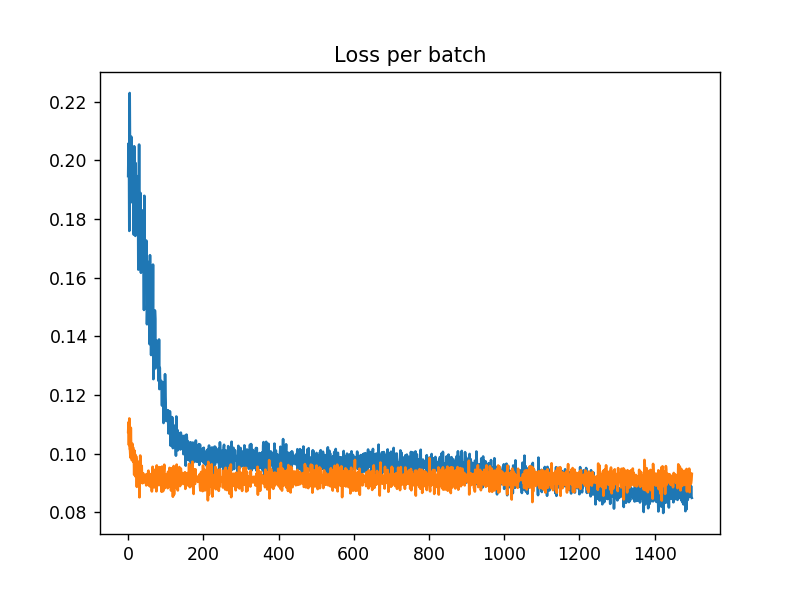

In [69]:
B = Model(inputs = B0, outputs = B3)
history = LossHistory()
B.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(lr = 0.001),
              metrics=['accuracy'])
B.fit(train_y, train_x, epochs=500, batch_size=10,
                callbacks=[history],
                validation_data=(test_y, test_x), verbose=2)
score = B.evaluate(test_y, test_x, batch_size=20)
print(score)
plot_losses(history.losses)

In [70]:
B1.trainable = False
B2.trainable = False
B3.trainable = False
C = Model(inputs = A.input, outputs = B(A.output))
print(C.summary())
print(A.summary())

print(B.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
A1 (InputLayer)              (None, 50)                0         
_________________________________________________________________
A2 (Dense)                   (None, 10)                510       
_________________________________________________________________
A3 (Dense)                   (None, 20)                220       
_________________________________________________________________
A4 (Dense)                   (None, 1)                 21        
_________________________________________________________________
model_35 (Model)             (None, 50)                1290      
Total params: 2,041
Trainable params: 2,041
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
A1 

In [71]:
C.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.Adam(lr = 0.001),
              metrics=['accuracy'])
C.fit(train_x, train_x, epochs=500, batch_size=10,
                callbacks=[history],
                validation_data=(test_x, test_x), verbose=2)
score = C.evaluate(test_x, test_x, batch_size=20)
print(score)
plot_losses(history.losses)

Train on 30 samples, validate on 10 samples
Epoch 1/500
 - 2s - loss: 0.1070 - acc: 0.0667 - val_loss: 0.0966 - val_acc: 0.0000e+00
Epoch 2/500
 - 0s - loss: 0.1049 - acc: 0.0333 - val_loss: 0.0955 - val_acc: 0.0000e+00
Epoch 3/500
 - 0s - loss: 0.1027 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 4/500
 - 0s - loss: 0.1009 - acc: 0.0333 - val_loss: 0.0938 - val_acc: 0.0000e+00
Epoch 5/500
 - 0s - loss: 0.0991 - acc: 0.0333 - val_loss: 0.0933 - val_acc: 0.0000e+00
Epoch 6/500
 - 0s - loss: 0.0975 - acc: 0.0333 - val_loss: 0.0929 - val_acc: 0.0000e+00
Epoch 7/500
 - 0s - loss: 0.0962 - acc: 0.0333 - val_loss: 0.0927 - val_acc: 0.0000e+00
Epoch 8/500
 - 0s - loss: 0.0952 - acc: 0.0333 - val_loss: 0.0926 - val_acc: 0.0000e+00
Epoch 9/500
 - 0s - loss: 0.0943 - acc: 0.0333 - val_loss: 0.0927 - val_acc: 0.0000e+00
Epoch 10/500
 - 0s - loss: 0.0935 - acc: 0.0333 - val_loss: 0.0928 - val_acc: 0.0000e+00
Epoch 11/500
 - 0s - loss: 0.0928 - acc: 0.0333 - val_loss: 0.0930 - val_ac

Epoch 93/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0947 - val_acc: 0.0000e+00
Epoch 94/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0947 - val_acc: 0.0000e+00
Epoch 95/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0947 - val_acc: 0.0000e+00
Epoch 96/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 97/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 98/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 99/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0945 - val_acc: 0.0000e+00
Epoch 100/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0945 - val_acc: 0.0000e+00
Epoch 101/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0945 - val_acc: 0.0000e+00
Epoch 102/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0945 - val_acc: 0.0000e+00
Epoch 103/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 104/500
 - 

Epoch 185/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 186/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0947 - val_acc: 0.0000e+00
Epoch 187/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0947 - val_acc: 0.0000e+00
Epoch 188/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0947 - val_acc: 0.0000e+00
Epoch 189/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 190/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 191/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 192/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 193/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 194/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 195/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 196/

Epoch 277/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 278/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 279/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 280/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0947 - val_acc: 0.0000e+00
Epoch 281/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0947 - val_acc: 0.0000e+00
Epoch 282/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0947 - val_acc: 0.0000e+00
Epoch 283/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 284/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0947 - val_acc: 0.0000e+00
Epoch 285/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 286/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 287/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 288/

Epoch 369/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0947 - val_acc: 0.0000e+00
Epoch 370/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0947 - val_acc: 0.0000e+00
Epoch 371/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 372/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 373/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 374/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0945 - val_acc: 0.0000e+00
Epoch 375/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 376/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 377/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 378/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0947 - val_acc: 0.0000e+00
Epoch 379/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 380/

Epoch 461/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0945 - val_acc: 0.0000e+00
Epoch 462/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 463/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 464/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 465/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 466/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0945 - val_acc: 0.0000e+00
Epoch 467/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 468/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 469/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 470/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0947 - val_acc: 0.0000e+00
Epoch 471/500
 - 0s - loss: 0.0913 - acc: 0.0333 - val_loss: 0.0946 - val_acc: 0.0000e+00
Epoch 472/

In [72]:
print("Training data accuracy")
for i in range(len(train_x)):
    print("True R_norm: " + str(train_y[i]) + "\tPredicted R_norm: " + str(A.predict(np.reshape(train_x[i], (1, 50)))))

Training data accuracy
True R_norm: [0.24166667]	Predicted R_norm: [[0.5108424]]
True R_norm: [0.36666667]	Predicted R_norm: [[0.5570331]]
True R_norm: [0.15833333]	Predicted R_norm: [[0.53147006]]
True R_norm: [0.28333333]	Predicted R_norm: [[0.48229438]]
True R_norm: [0.20833333]	Predicted R_norm: [[0.5092731]]
True R_norm: [0.26666667]	Predicted R_norm: [[0.56845367]]
True R_norm: [0.41666667]	Predicted R_norm: [[0.5188996]]
True R_norm: [0.34166667]	Predicted R_norm: [[0.5569285]]
True R_norm: [0.175]	Predicted R_norm: [[0.48335436]]
True R_norm: [0.10833333]	Predicted R_norm: [[0.5353288]]
True R_norm: [0.13333333]	Predicted R_norm: [[0.5346823]]
True R_norm: [0.3]	Predicted R_norm: [[0.5284416]]
True R_norm: [0.4]	Predicted R_norm: [[0.5421998]]
True R_norm: [0.18333333]	Predicted R_norm: [[0.52681404]]
True R_norm: [0.125]	Predicted R_norm: [[0.5350724]]
True R_norm: [0.31666667]	Predicted R_norm: [[0.49029785]]
True R_norm: [0.30833333]	Predicted R_norm: [[0.507086]]
True R_nor

In [73]:
print("Testing data accuracy")
for i in range(len(test_x)):
    print("True R_norm: " + str(test_y[i]) + "\tPredicted R_norm: " + str(A.predict(np.reshape(test_x[i], (1, 50)))))

Testing data accuracy
True R_norm: [0.25]	Predicted R_norm: [[0.5767561]]
True R_norm: [0.21666667]	Predicted R_norm: [[0.5502304]]
True R_norm: [0.35833333]	Predicted R_norm: [[0.56530255]]
True R_norm: [0.39166667]	Predicted R_norm: [[0.51052064]]
True R_norm: [0.275]	Predicted R_norm: [[0.51006514]]
True R_norm: [0.33333333]	Predicted R_norm: [[0.49281788]]
True R_norm: [0.29166667]	Predicted R_norm: [[0.5327202]]
True R_norm: [0.40833333]	Predicted R_norm: [[0.56894445]]
True R_norm: [0.35]	Predicted R_norm: [[0.55399096]]
True R_norm: [0.23333333]	Predicted R_norm: [[0.50481987]]
